<a id='Q0'></a>
<center> <h1> Crypto Project - Bitcoin Price Machine Learning Experiment </h1> </center>
<center> <h2 class="blue-text" style="color: blue"> Neural Networks </h2> </center>
<center> <h3 class="red-text" style="color: red"> EXPERIMENT </h3> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>ZHAW CAS DAENG Group 4, 09 July 2021</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#06065c10;border-top:0.01cm solid #53c653;border-bottom:0.01cm solid #53c653;color:#303030">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm">
        <p><strong>Goal: </strong>Train different machine learning models and try to predict the daily returns of Bitcoin Prices (Regression)</p>
        <p>Train and Test Algorithms, Cross-Validate, Tune Parameters, Compare Test Performance, select & store estimator models.</p>
        <p> <strong> Outline:</strong>
        <a id="P0" name="P0"></a>
        <ol>
            <li> <a href='#I'>Import Libraries & Setup Project Directory</a> </li>
            <li> <a href='#R'>Read & look at the data</a></li>
            <li> <a href='#P'>Preprocessing</a></li>
            <li> <a href='#M'>Simple MLP Model</a></li>
            <li> <a href='#D'>Dense Neural Network (DNN) Model</a></li>
            <li> <a href='#C'>Recurrent Neural Network (RNN) Model</a></li>
            <li> <a href='#T'>Time Series Forecasting with Tensorflow</a></li>
                <ol>
                    <li><a href='#t0'>Data Load and Preprocessing</a></li>
                    <li><a href='#t1'>Single Step Models</a></li>
                    <li><a href='#t2'>Linear Model</a></li>
                    <li><a href='#t3'>Dense Model</a></li>
                    <li><a href='#t4'>Convolutional Neural Network Model</a></li>
                    <li><a href='#t5'>Recurrent Neural Network Model</a></li>
                    <li><a href='#t6'>Multi-output Models</a></li>
                    <li><a href='#t6'>Test Evaluation</a></li>
                    <li><a href='#t6'>Autoregressive Models</a></li>
                </ol>
        </ol>
    </div>
</div>

<a id='I'></a>
## <font color='darkblue'>__Import Libraries__</font>

In [1]:
# General libraries
import os
import pathlib
import time
import warnings
import dill
warnings.filterwarnings("ignore")

In [2]:
# Data manipulation and statistical libraries
import numpy as np
import pandas as pd
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
import IPython
%matplotlib inline

In [4]:
# Sckit-Learn processing libraries
from sklearn.model_selection import (train_test_split, TimeSeriesSplit, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, 
                                     RepeatedKFold, RepeatedStratifiedKFold, GroupShuffleSplit)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    max_error,
    explained_variance_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
    precision_recall_curve,
    roc_curve,
    plot_roc_curve,
    plot_precision_recall_curve,
    f1_score,
    r2_score,
    roc_auc_score
)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from tscv import GapRollForward

In [5]:
# NN Model libraries
from sklearn.neural_network import MLPClassifier, MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils.vis_utils import plot_model

In [6]:
def adjusted_r2_score(y_true, y_pred, X_test):
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true) - X_test.shape[1]-1)
    return adjusted_r2

In [7]:
# Setup the project directory
workdir = pathlib.Path().absolute()
project_dir = workdir.parent
data_path = f"{project_dir}\\00_Data\\"
print(data_path)

C:\Users\akosr\CAS_DAENG\Modul_02\crypto_project_ML\00_Data\


<a id='R'></a>
## <font color='darkblue'>__Looak at the Data__</font>

In [8]:
df_nn = pd.read_csv(data_path+'bitcoin_full_daily_returns.csv')

In [9]:
df_nn.shape

(2654, 50)

In [10]:
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2654 non-null   object 
 1   WeightedPrice_return    2654 non-null   float64
 2   DASH_return             2654 non-null   float64
 3   DOGE_return             2654 non-null   float64
 4   ETC_return              2654 non-null   float64
 5   ETH_return              2654 non-null   float64
 6   LTC_return              2654 non-null   float64
 7   SC_return               2654 non-null   float64
 8   XEM_return              2654 non-null   float64
 9   XMR_return              2654 non-null   float64
 10  XRP_return              2654 non-null   float64
 11  ZEC_return              2654 non-null   float64
 12  CLF_return              2654 non-null   float64
 13  CNYUSDX_return          2654 non-null   float64
 14  DJI_return              2654 non-null   

In [11]:
df_nn.set_index('Date', inplace = True)

In [12]:
df_nn.isna().sum()

WeightedPrice_return      0
DASH_return               0
DOGE_return               0
ETC_return                0
ETH_return                0
LTC_return                0
SC_return                 0
XEM_return                0
XMR_return                0
XRP_return                0
ZEC_return                0
CLF_return                0
CNYUSDX_return            0
DJI_return                0
EURUSDX_return            0
GCF_return                0
GSPC_return               0
IXIC_return               0
JPYUSDX_return            0
TSLA_return               0
VIX_return                0
XWDTO_return              0
Volume                    0
SMA_30                    0
EMA_40                    0
Altcoin_EMA_40            0
Cost_per_TR               0
Num_TR_per_Block          0
Bu_Be_Spread_MA8          0
SMA_05                    0
SMA_90                    0
EMA_05                    0
EMA_90                    0
MACD                      0
Avg_Dir_Mvmt              0
RSI                 

In [13]:
df_nn.head()

,WeightedPrice_return,DASH_return,DOGE_return,ETC_return,ETH_return,LTC_return,SC_return,XEM_return,XMR_return,XRP_return,...,Ultimate_Osc,True_SI,Cum_Return,Log_Return,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate,sentiment_elon,sentiment_bitcoin
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-27,0.011386,-0.008975,0.053527,0.0,0.0,-0.015164,0.0,0.0,0.0,0.0,...,58.716324,-36.370363,-30.554323,-0.435788,70859.0,185098.0,95229.0,29478.51454,neutral,positive
2014-02-28,-0.027055,-0.175048,-0.075702,0.0,0.0,-0.048588,0.0,0.0,0.0,0.0,...,53.579582,-35.543868,-34.123058,-5.275634,70290.0,196525.0,92184.0,31620.29868,neutral,positive
2014-03-01,-0.011626,0.650333,-0.027232,0.0,0.0,-0.023403,0.0,0.0,0.0,0.0,...,52.170204,-34.013875,-32.549358,2.360762,63402.0,181719.0,100239.0,27215.36710,neutral,positive
2014-03-02,0.007199,0.065323,-0.052048,0.0,0.0,0.002097,0.0,0.0,0.0,0.0,...,54.508004,-32.805675,-32.565198,-0.023487,56635.0,159491.0,80905.0,26872.26576,neutral,positive
2014-03-03,0.103996,0.182002,0.041269,0.0,0.0,0.003390,0.0,0.0,0.0,0.0,...,63.022875,-25.115659,-19.968961,17.125332,81264.0,237371.0,123677.0,28209.55635,neutral,positive


<a id='P'></a>
## <font color='darkblue'>__Preprocessing__</font>

In [14]:
X = df_nn.drop('WeightedPrice_return', axis=1) 
y = df_nn['WeightedPrice_return']

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, 2014-02-27 to 2021-06-03
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DASH_return             2654 non-null   float64
 1   DOGE_return             2654 non-null   float64
 2   ETC_return              2654 non-null   float64
 3   ETH_return              2654 non-null   float64
 4   LTC_return              2654 non-null   float64
 5   SC_return               2654 non-null   float64
 6   XEM_return              2654 non-null   float64
 7   XMR_return              2654 non-null   float64
 8   XRP_return              2654 non-null   float64
 9   ZEC_return              2654 non-null   float64
 10  CLF_return              2654 non-null   float64
 11  CNYUSDX_return          2654 non-null   float64
 12  DJI_return              2654 non-null   float64
 13  EURUSDX_return          2654 non-null   float64
 14  GCF_return              2654 n

### Train Test Split

In [16]:
tscv = TimeSeriesSplit()

In [17]:
for train, test in tscv.split(X):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

In [18]:
test_length = len(X_test)

In [19]:
X_train_nn = X_train[X_train.index<=X_train.index[-test_length-1]]
X_valid_nn = X_train[(X_train.index>X_train.index[-test_length-1]) & (X_train.index<=X_train.index[-1])]
X_test_nn = X_test[(X_test.index>=X_test.index[0]) & (X_test.index<=X_test.index[-1])]

In [20]:
y_train_nn = y_train[y_train.index<=y_train.index[-test_length-1]]
y_valid_nn = y_train[(y_train.index>y_train.index[-test_length-1]) & (y_train.index<=y_train.index[-1])]
y_test_nn = y_test[(y_test.index>=y_test.index[0]) & (y_test.index<=y_test.index[-1])]

### Transformation Training Data

In [21]:
X_train_nn_cat = X_train_nn.select_dtypes(include='object')
X_train_nn_num = X_train_nn.select_dtypes(exclude='object')

#### One-Hot Encoding

In [22]:
cat_cols = X_train_nn_cat.columns
cat_dummy_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_nn_cat_ohe = cat_dummy_encoder.fit_transform(X_train_nn_cat).toarray()
X_train_nn_cat_ohe, cat_dummy_encoder.get_feature_names(cat_cols)

(array([[0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 1.],
        ...,
        [0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 1.]]),
 array(['sentiment_elon_negative', 'sentiment_elon_neutral',
        'sentiment_elon_positive', 'sentiment_bitcoin_negative',
        'sentiment_bitcoin_positive'], dtype=object))

In [23]:
cat_ohe_cols = cat_dummy_encoder.get_feature_names(cat_cols)
X_train_nn_cat_ohe = pd.DataFrame(X_train_nn_cat_ohe,
                                  columns=cat_ohe_cols)

In [24]:
X_train_nn_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sentiment_elon_negative     1770 non-null   float64
 1   sentiment_elon_neutral      1770 non-null   float64
 2   sentiment_elon_positive     1770 non-null   float64
 3   sentiment_bitcoin_negative  1770 non-null   float64
 4   sentiment_bitcoin_positive  1770 non-null   float64
dtypes: float64(5)
memory usage: 69.3 KB


#### Scaling

In [25]:
num_cols = X_train_nn_num.columns
scaler = StandardScaler()
X_train_nn_num = pd.DataFrame(scaler.fit_transform(X_train_nn_num), columns=num_cols)

In [26]:
X_train_nn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DASH_return             1770 non-null   float64
 1   DOGE_return             1770 non-null   float64
 2   ETC_return              1770 non-null   float64
 3   ETH_return              1770 non-null   float64
 4   LTC_return              1770 non-null   float64
 5   SC_return               1770 non-null   float64
 6   XEM_return              1770 non-null   float64
 7   XMR_return              1770 non-null   float64
 8   XRP_return              1770 non-null   float64
 9   ZEC_return              1770 non-null   float64
 10  CLF_return              1770 non-null   float64
 11  CNYUSDX_return          1770 non-null   float64
 12  DJI_return              1770 non-null   float64
 13  EURUSDX_return          1770 non-null   float64
 14  GCF_return              1770 non-null   

#### Combine Numeric and encoded Categorical Features

In [27]:
X_train = pd.concat([X_train_nn_num, X_train_nn_cat_ohe], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DASH_return                 1770 non-null   float64
 1   DOGE_return                 1770 non-null   float64
 2   ETC_return                  1770 non-null   float64
 3   ETH_return                  1770 non-null   float64
 4   LTC_return                  1770 non-null   float64
 5   SC_return                   1770 non-null   float64
 6   XEM_return                  1770 non-null   float64
 7   XMR_return                  1770 non-null   float64
 8   XRP_return                  1770 non-null   float64
 9   ZEC_return                  1770 non-null   float64
 10  CLF_return                  1770 non-null   float64
 11  CNYUSDX_return              1770 non-null   float64
 12  DJI_return                  1770 non-null   float64
 13  EURUSDX_return              1770 

### Transformation Validation Data

In [28]:
X_valid_nn_cat = X_valid_nn.select_dtypes(include='object')
X_valid_nn_num = X_valid_nn.select_dtypes(exclude='object')

#### One-Hot Encoding

In [29]:
X_valid_nn_cat_ohe = cat_dummy_encoder.transform(X_valid_nn_cat).toarray()
X_valid_nn_cat_ohe

array([[0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.]])

In [30]:
X_valid_nn_cat_ohe = pd.DataFrame(X_valid_nn_cat_ohe,
                                  columns=cat_ohe_cols)

In [31]:
X_valid_nn_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sentiment_elon_negative     442 non-null    float64
 1   sentiment_elon_neutral      442 non-null    float64
 2   sentiment_elon_positive     442 non-null    float64
 3   sentiment_bitcoin_negative  442 non-null    float64
 4   sentiment_bitcoin_positive  442 non-null    float64
dtypes: float64(5)
memory usage: 17.4 KB


#### Scaling

In [32]:
X_valid_nn_num = pd.DataFrame(scaler.transform(X_valid_nn_num), columns=num_cols)

In [33]:
X_valid_nn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DASH_return             442 non-null    float64
 1   DOGE_return             442 non-null    float64
 2   ETC_return              442 non-null    float64
 3   ETH_return              442 non-null    float64
 4   LTC_return              442 non-null    float64
 5   SC_return               442 non-null    float64
 6   XEM_return              442 non-null    float64
 7   XMR_return              442 non-null    float64
 8   XRP_return              442 non-null    float64
 9   ZEC_return              442 non-null    float64
 10  CLF_return              442 non-null    float64
 11  CNYUSDX_return          442 non-null    float64
 12  DJI_return              442 non-null    float64
 13  EURUSDX_return          442 non-null    float64
 14  GCF_return              442 non-null    fl

#### Combine Numeric and encoded Categorical Features

In [34]:
X_valid = pd.concat([X_valid_nn_num, X_valid_nn_cat_ohe], axis=1)
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DASH_return                 442 non-null    float64
 1   DOGE_return                 442 non-null    float64
 2   ETC_return                  442 non-null    float64
 3   ETH_return                  442 non-null    float64
 4   LTC_return                  442 non-null    float64
 5   SC_return                   442 non-null    float64
 6   XEM_return                  442 non-null    float64
 7   XMR_return                  442 non-null    float64
 8   XRP_return                  442 non-null    float64
 9   ZEC_return                  442 non-null    float64
 10  CLF_return                  442 non-null    float64
 11  CNYUSDX_return              442 non-null    float64
 12  DJI_return                  442 non-null    float64
 13  EURUSDX_return              442 non

### Transformation Test Data

In [35]:
X_test_nn_cat = X_test_nn.select_dtypes(include='object')
X_test_nn_num = X_test_nn.select_dtypes(exclude='object')

#### One-Hot Encoding

In [36]:
X_test_nn_cat_ohe = cat_dummy_encoder.transform(X_test_nn_cat).toarray()
X_test_nn_cat_ohe

array([[0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       ...,
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [37]:
X_test_nn_cat_ohe = pd.DataFrame(X_test_nn_cat_ohe,
                                  columns=cat_ohe_cols)

In [38]:
X_test_nn_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sentiment_elon_negative     442 non-null    float64
 1   sentiment_elon_neutral      442 non-null    float64
 2   sentiment_elon_positive     442 non-null    float64
 3   sentiment_bitcoin_negative  442 non-null    float64
 4   sentiment_bitcoin_positive  442 non-null    float64
dtypes: float64(5)
memory usage: 17.4 KB


#### Scaling

In [39]:
X_test_nn_num = pd.DataFrame(scaler.transform(X_test_nn_num), columns=num_cols)

In [40]:
X_test_nn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DASH_return             442 non-null    float64
 1   DOGE_return             442 non-null    float64
 2   ETC_return              442 non-null    float64
 3   ETH_return              442 non-null    float64
 4   LTC_return              442 non-null    float64
 5   SC_return               442 non-null    float64
 6   XEM_return              442 non-null    float64
 7   XMR_return              442 non-null    float64
 8   XRP_return              442 non-null    float64
 9   ZEC_return              442 non-null    float64
 10  CLF_return              442 non-null    float64
 11  CNYUSDX_return          442 non-null    float64
 12  DJI_return              442 non-null    float64
 13  EURUSDX_return          442 non-null    float64
 14  GCF_return              442 non-null    fl

#### Combine Numeric and encoded Categorical Features

In [41]:
X_test = pd.concat([X_test_nn_num, X_test_nn_cat_ohe], axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DASH_return                 442 non-null    float64
 1   DOGE_return                 442 non-null    float64
 2   ETC_return                  442 non-null    float64
 3   ETH_return                  442 non-null    float64
 4   LTC_return                  442 non-null    float64
 5   SC_return                   442 non-null    float64
 6   XEM_return                  442 non-null    float64
 7   XMR_return                  442 non-null    float64
 8   XRP_return                  442 non-null    float64
 9   ZEC_return                  442 non-null    float64
 10  CLF_return                  442 non-null    float64
 11  CNYUSDX_return              442 non-null    float64
 12  DJI_return                  442 non-null    float64
 13  EURUSDX_return              442 non

In [42]:
X_train.head()

,DASH_return,DOGE_return,ETC_return,ETH_return,LTC_return,SC_return,XEM_return,XMR_return,XRP_return,ZEC_return,...,Log_Return,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate,sentiment_elon_negative,sentiment_elon_neutral,sentiment_elon_positive,sentiment_bitcoin_negative,sentiment_bitcoin_positive
0,-0.203269,0.762519,-0.038731,-0.062226,-0.311078,-0.058177,-0.063191,-0.051985,-0.062447,-0.023314,...,-0.137404,-1.406351,-1.316372,-1.273692,-0.612506,0.0,1.0,0.0,0.0,1.0
1,-2.639917,-1.169044,-0.038731,-0.062226,-0.923036,-0.058177,-0.063191,-0.051985,-0.062447,-0.023314,...,-1.363674,-1.413085,-1.268371,-1.298860,-0.612365,0.0,1.0,0.0,0.0,1.0
2,9.470198,-0.444573,-0.038731,-0.062226,-0.461927,-0.058177,-0.063191,-0.051985,-0.062447,-0.023314,...,0.571156,-1.494610,-1.330565,-1.232282,-0.612656,0.0,1.0,0.0,0.0,1.0
3,0.886838,-0.815491,-0.038731,-0.062226,0.004957,-0.058177,-0.063191,-0.051985,-0.062447,-0.023314,...,-0.032940,-1.574703,-1.423937,-1.392086,-0.612678,0.0,1.0,0.0,0.0,1.0
4,2.598776,0.579294,-0.038731,-0.062226,0.028637,-0.058177,-0.063191,-0.051985,-0.062447,-0.023314,...,4.312048,-1.283199,-1.096793,-1.038557,-0.612590,0.0,1.0,0.0,0.0,1.0


In [43]:
X_train.shape

(1770, 51)

In [44]:
X_train.describe().transpose()[['mean', 'std', 'min', 'max']]

,mean,std,min,max
DASH_return,5.017957e-18,1.000283,-5.102595,9.470198
DOGE_return,-2.007183e-17,1.000283,-4.033317,8.361404
ETC_return,4.014366e-18,1.000283,-4.828876,29.303224
ETH_return,-8.028731e-18,1.000283,-15.331342,7.255590
LTC_return,-4.014366e-18,1.000283,-5.568384,10.816879
SC_return,4.014366e-18,1.000283,-9.474729,11.136732
XEM_return,1.605746e-17,1.000283,-11.706750,9.650565
XMR_return,4.014366e-18,1.000283,-10.851952,13.072409
XRP_return,-1.204310e-17,1.000283,-4.213683,12.858323
ZEC_return,6.021549e-18,1.000283,-0.329752,42.049655


<a id='M'></a>
## <font color='darkblue'>__Simple MLP Model__</font>

In [45]:
model_simple = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model_simple.compile(loss=tf.losses.MeanSquaredError(),
                     optimizer=tf.optimizers.Adam(),
                     metrics=[tf.metrics.MeanAbsoluteError()])

history = model_simple.fit(X_train, y_train_nn, epochs=100,
                          validation_data=(X_valid, y_valid_nn), shuffle=False)
IPython.display.clear_output()
mse_test = model_simple.evaluate(X_test, y_test_nn)
X_new = X_test[:3] #pretend these are new instances
y_pred = model_simple.predict(X_new)

14/14 [==============================] - 0s 714us/step - loss: 0.5164 - mean_absolute_error: 0.4332


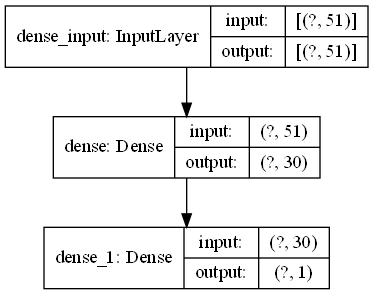

In [46]:
keras.utils.plot_model(model_simple, "simple_model.png", show_shapes=True)

In [47]:
hist = pd.DataFrame(history.history)

In [48]:
hist['epoch'] = history.epoch

In [49]:
hist.tail()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
95,0.001087,0.025298,0.004099,0.046668,95
96,0.001025,0.024418,0.004140,0.049178,96
97,0.000909,0.023628,0.003739,0.045089,97
98,0.000882,0.023003,0.003643,0.044471,98
99,0.000867,0.022831,0.003815,0.046665,99


In [50]:
test_results = {}

test_results['simple_model'] = model_simple.evaluate(
    X_test,
    y_test_nn, verbose=0)

In [51]:
def plot_loss(history, target):
    plt.plot(hist['loss'], label='loss')
    plt.plot(hist['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error ['+target+']')
    plt.legend()
    plt.grid(True)

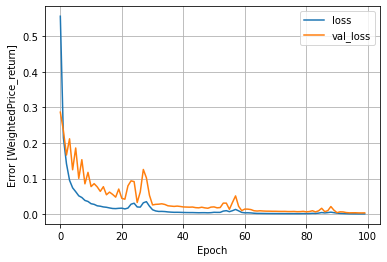

In [52]:
plot_loss(history, 'WeightedPrice_return')

In [53]:
def plot_target_feature(x, y, target, feature):
  plt.scatter(X_train[feature], y_train_nn, label='Data')
  plt.plot(x[feature], y, color='k', label='Predictions')
  plt.xlabel(feature)
  plt.ylabel(target)
  plt.legend()

In [54]:
x = X_test[:5]
y = model_simple.predict(x)

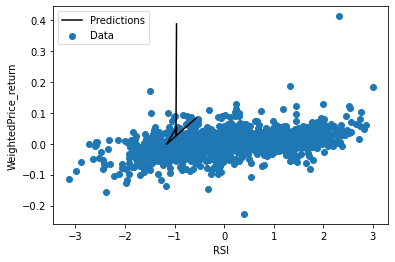

In [55]:
plot_target_feature(x, y, 'WeightedPrice_return', 'RSI')

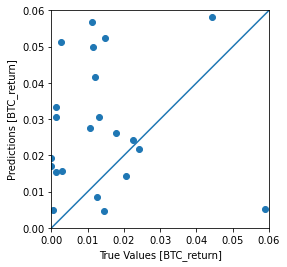

In [56]:
y_hat = model_simple.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test_nn, y_hat)
plt.xlabel('True Values [BTC_return]')
plt.ylabel('Predictions [BTC_return]')
lims = [0, 0.06]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

<a id='D'></a>
## <font color='darkblue'>__Dense Neural Network (DNN) Model__</font>

In [57]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu', input_shape=X_train.shape[1:]),
      layers.Dense(64, activation='relu', input_shape=X_train.shape[1:]),
      layers.Dense(1)
  ])

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
  return model

In [58]:
normalizer = preprocessing.Normalization(axis=-1)

In [59]:
normalizer.adapt(np.array(X_train))

In [60]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 51)                103       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                3328      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 7,656
Trainable params: 7,553
Non-trainable params: 103
_________________________________________________________________


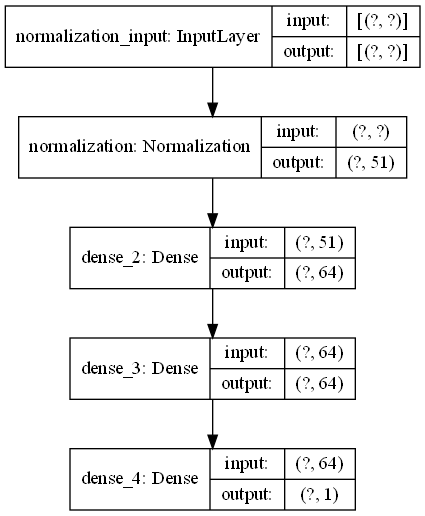

In [61]:
keras.utils.plot_model(dnn_model, "dnn_model.png", show_shapes=True)

In [62]:
%%time
history_dnn = dnn_model.fit(
     X_train, y_train_nn,
     validation_data=(X_valid, y_valid_nn),
     verbose=0, epochs=100)

Wall time: 5.64 s


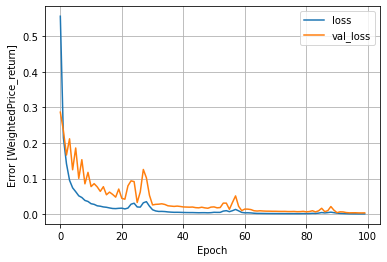

In [63]:
plot_loss(history_dnn, 'WeightedPrice_return')

In [64]:
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test_nn, verbose=0)

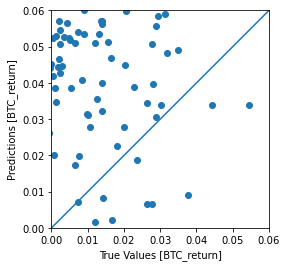

In [65]:
y_hat_dnn = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test_nn, y_hat_dnn)
plt.xlabel('True Values [BTC_return]')
plt.ylabel('Predictions [BTC_return]')
lims = [0, 0.06]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

<a id='C'></a>
## <font color='darkblue'>__Implementing a Recurrent Neural Network (RNN) Model__</font>

In [66]:
# Naive forecasting
test_results['naive'] = np.mean(keras.losses.mean_squared_error(y_valid_nn, y_test_nn))

In [67]:
test_results['naive']

0.002166052046533574

In [68]:
# Lin Regression Model
model_lin = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model_lin.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

history_lin = model_lin.fit(X_train, y_train_nn, epochs=20,
                          validation_data=(X_valid, y_valid_nn))
IPython.display.clear_output()
mse_test_lin = model_lin.evaluate(X_test, y_test_nn)
test_results['linear_model'] = mse_test_lin

14/14 [==============================] - 0s 857us/step - loss: 1.1267 - mean_absolute_error: 0.8037


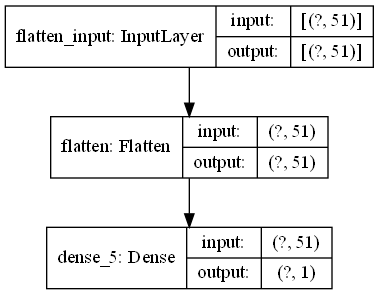

In [69]:
keras.utils.plot_model(model_lin, "lin_model.png", show_shapes=True)

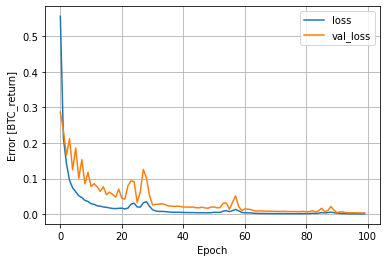

In [70]:
plot_loss(history_lin, 'BTC_return')

In [71]:
test_results

{'simple_model': [0.516386091709137, 0.4332243502140045],
 'dnn_model': [0.037739306688308716, 0.14593768119812012],
 'naive': 0.002166052046533574,
 'linear_model': [1.1266578435897827, 0.803749680519104]}

In [72]:
X_test.shape

(442, 51)

### RNN

In [73]:
test_results

{'simple_model': [0.516386091709137, 0.4332243502140045],
 'dnn_model': [0.037739306688308716, 0.14593768119812012],
 'naive': 0.002166052046533574,
 'linear_model': [1.1266578435897827, 0.803749680519104]}

#### Performance

<a id='T'></a>
## <font color='darkblue'>__Time Series Forecasting with Tensorflow__</font>

<a id='t0'></a>
### <font color='darkblue'>__Data Load and Preprocessing__</font>

### Descriptives

https://www.tensorflow.org/tutorials/structured_data/time_series

In [74]:
df_nn.describe().T

,count,mean,std,min,25%,50%,75%,max
WeightedPrice_return,2654.0,2.152529e-03,3.374595e-02,-0.227187,-0.011616,1.397842e-03,1.641338e-02,4.127627e-01
DASH_return,2654.0,4.057017e-03,6.323055e-02,-0.342895,-0.025517,-6.187222e-04,2.615049e-02,6.503333e-01
DOGE_return,2654.0,4.778037e-03,7.895444e-02,-0.319407,-0.024863,-1.911478e-03,2.179802e-02,1.427517e+00
ETC_return,2654.0,3.079187e-03,6.099983e-02,-0.306498,-0.009472,0.000000e+00,1.093061e-02,1.877450e+00
ETH_return,2654.0,3.804522e-03,5.250615e-02,-0.877162,-0.012273,0.000000e+00,1.974641e-02,4.203850e-01
LTC_return,2654.0,2.256214e-03,5.183254e-02,-0.302304,-0.019517,-3.114713e-04,2.036733e-02,5.926147e-01
SC_return,2654.0,4.886202e-03,8.231037e-02,-0.849481,-0.024630,0.000000e+00,2.047998e-02,1.009909e+00
XEM_return,2654.0,4.175567e-03,7.039710e-02,-0.898653,-0.023544,0.000000e+00,2.245503e-02,7.497104e-01
XMR_return,2654.0,3.510912e-03,6.391762e-02,-0.787380,-0.024270,0.000000e+00,2.559479e-02,9.568437e-01
XRP_return,2654.0,3.733373e-03,6.401171e-02,-0.311551,-0.018611,0.000000e+00,1.799950e-02,8.903142e-01


In [75]:
df_nn.head()

,WeightedPrice_return,DASH_return,DOGE_return,ETC_return,ETH_return,LTC_return,SC_return,XEM_return,XMR_return,XRP_return,...,Ultimate_Osc,True_SI,Cum_Return,Log_Return,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate,sentiment_elon,sentiment_bitcoin
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-27,0.011386,-0.008975,0.053527,0.0,0.0,-0.015164,0.0,0.0,0.0,0.0,...,58.716324,-36.370363,-30.554323,-0.435788,70859.0,185098.0,95229.0,29478.51454,neutral,positive
2014-02-28,-0.027055,-0.175048,-0.075702,0.0,0.0,-0.048588,0.0,0.0,0.0,0.0,...,53.579582,-35.543868,-34.123058,-5.275634,70290.0,196525.0,92184.0,31620.29868,neutral,positive
2014-03-01,-0.011626,0.650333,-0.027232,0.0,0.0,-0.023403,0.0,0.0,0.0,0.0,...,52.170204,-34.013875,-32.549358,2.360762,63402.0,181719.0,100239.0,27215.36710,neutral,positive
2014-03-02,0.007199,0.065323,-0.052048,0.0,0.0,0.002097,0.0,0.0,0.0,0.0,...,54.508004,-32.805675,-32.565198,-0.023487,56635.0,159491.0,80905.0,26872.26576,neutral,positive
2014-03-03,0.103996,0.182002,0.041269,0.0,0.0,0.003390,0.0,0.0,0.0,0.0,...,63.022875,-25.115659,-19.968961,17.125332,81264.0,237371.0,123677.0,28209.55635,neutral,positive


In [76]:
elon_ohe = pd.get_dummies(df_nn.sentiment_elon, prefix='sentiment_elon')

In [77]:
btc_ohe = pd.get_dummies(df_nn.sentiment_bitcoin, prefix='sentiment_bitcoin')

In [78]:
df_nn_ohe = df_nn.merge(elon_ohe, how='inner', left_index=True, right_index=True).merge(btc_ohe, how='inner', left_index=True, right_index=True)

In [79]:
df_nn_ohe.drop(columns=['sentiment_elon', 'sentiment_bitcoin'], inplace=True)

### Train Test Split

In [80]:
column_indices = {name: i for i, name in enumerate(df_nn_ohe.columns)}

n = len(df_nn_ohe)
train_df = df_nn_ohe[0:int(n*0.7)]
val_df = df_nn_ohe[int(n*0.7):int(n*0.9)]
test_df = df_nn_ohe[int(n*0.9):]

num_features = df_nn_ohe.shape[1]

### Normalization

In [81]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

### Outliers

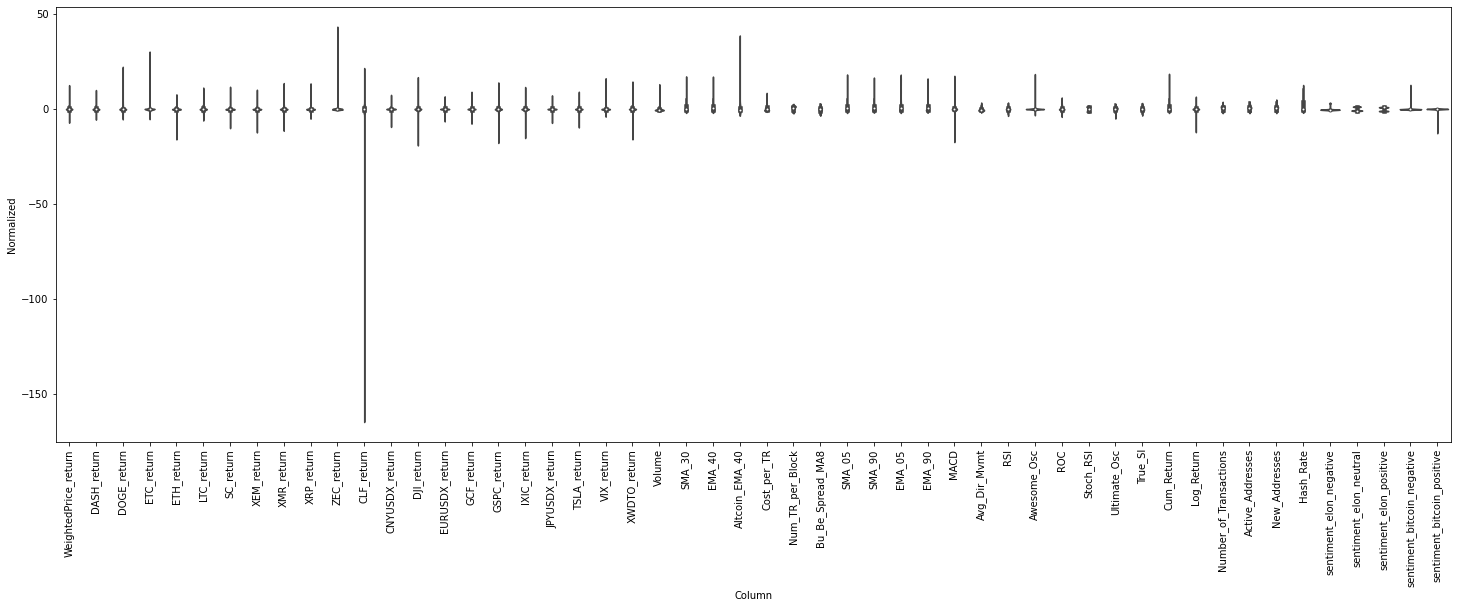

In [82]:
df_std = (df_nn_ohe - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(25, 8))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_nn_ohe.keys(), rotation=90)

### Data windowing

In [83]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [84]:
# Prediction into 30 days into the future, given 30 days history
w1 = WindowGenerator(input_width=30, label_width=1, shift=30,
                     label_columns=['WeightedPrice_return'])
w1

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [59]
Label column name(s): ['WeightedPrice_return']

In [85]:
# Prediction 1 day into the future, given 7 days of history
w2 = WindowGenerator(input_width=7, label_width=1, shift=1,
                     label_columns=['WeightedPrice_return'])
w2

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['WeightedPrice_return']

In [86]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [87]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 8, 52)
Inputs shape: (3, 7, 52)
labels shape: (3, 1, 1)


In [88]:
w2.example = example_inputs, example_labels

In [89]:
def window_plot(self, model=None, plot_col='WeightedPrice_return', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [d]')

WindowGenerator.window_plot = window_plot

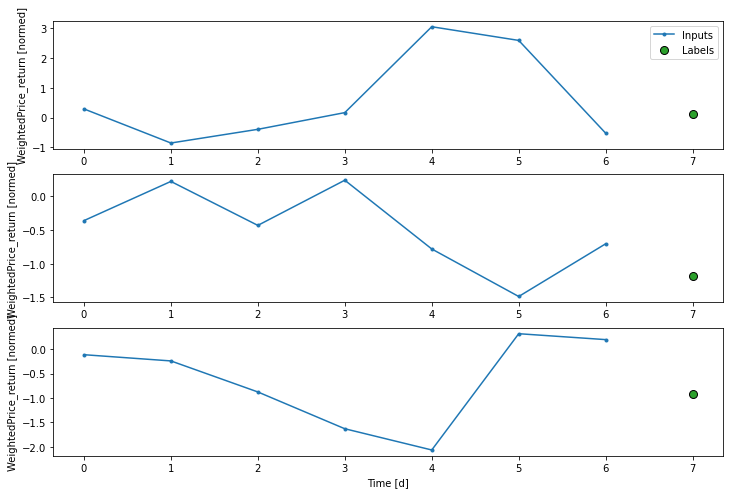

In [90]:
w2.window_plot()

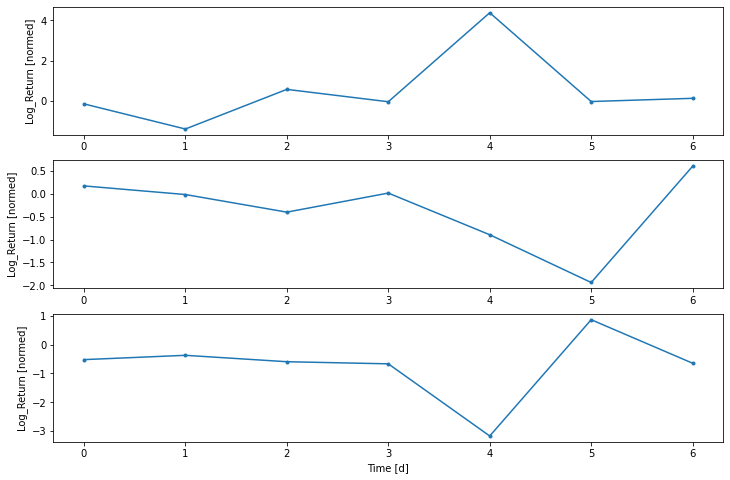

In [91]:
w2.window_plot(plot_col='Log_Return')

### Create the tf.Datasets

In [92]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [93]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [94]:
# Each element is an (inputs, label) pair
w2.train.element_spec

Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['WeightedPrice_return']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['WeightedPrice_return']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(TensorSpec(shape=(None, 7, 52), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [95]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 7, 52)
Labels shape (batch, time, features): (32, 1, 1)


<a id='t1'></a>
### <font color='darkblue'>__Single Step Models__</font>

In [96]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['WeightedPrice_return'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['WeightedPrice_return']

In [97]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 52)
Labels shape (batch, time, features): (32, 1, 1)


In [98]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [99]:
baseline = Baseline(label_index=column_indices['WeightedPrice_return'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
17/17 [==============================] - 0s 941us/step - loss: 1.3725 - mean_absolute_error: 0.7814


In [100]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['WeightedPrice_return'])

wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['WeightedPrice_return']

In [101]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 30, 52)
Output shape: (32, 30, 1)


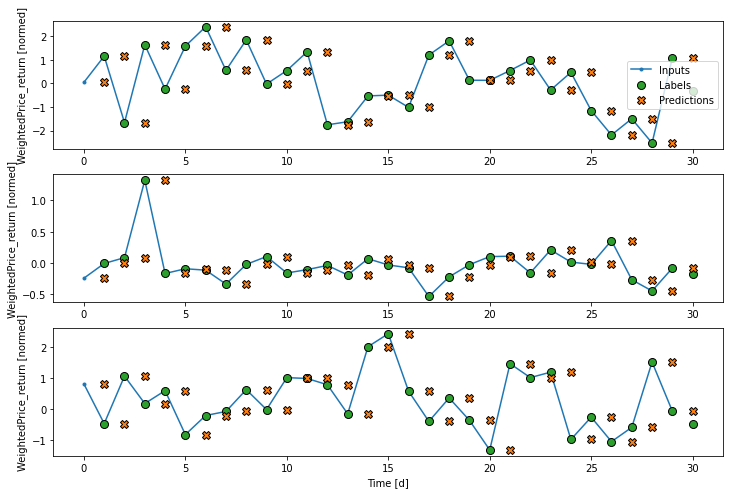

In [102]:
wide_window.window_plot(baseline)

<a id='t2'></a>
### <font color='darkblue'>__Linear Model__</font>

In [103]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [104]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 52)
Output shape: (32, 1, 1)


In [105]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [106]:
history_lin = compile_and_fit(linear, single_step_window)
IPython.display.clear_output()
val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

17/17 [==============================] - 0s 1ms/step - loss: 0.8047 - mean_absolute_error: 0.5919


In [107]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 30, 52)
Output shape: (32, 30, 1)


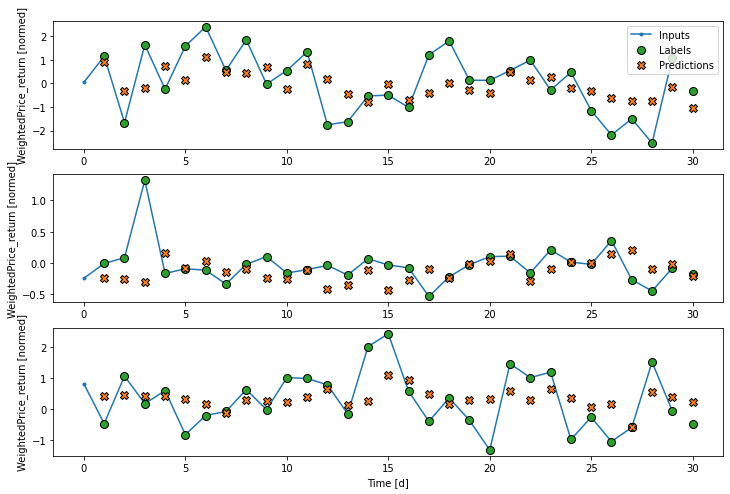

In [108]:
wide_window.window_plot(linear)

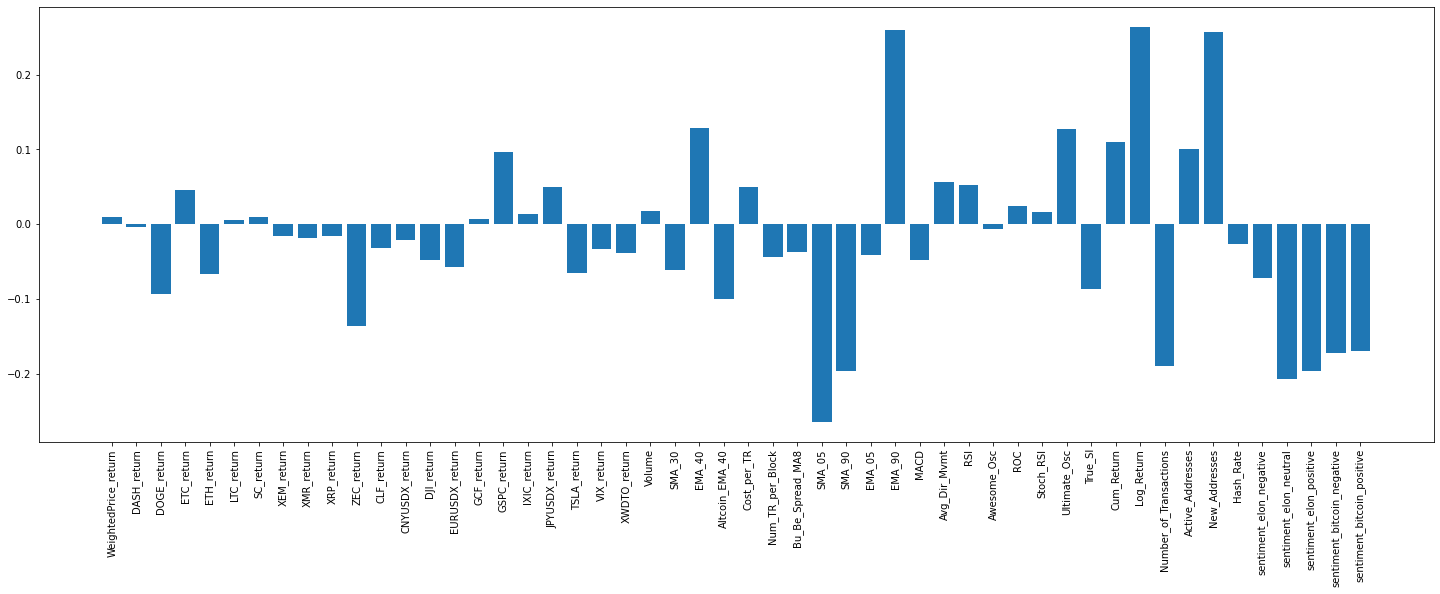

In [109]:
# The weight of the layers
plt.figure(figsize=(25, 8))
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

<a id='t3'></a>
### <font color='darkblue'>__Dense Model__</font>

In [110]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history_dense = compile_and_fit(dense, single_step_window)
IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

17/17 [==============================] - 0s 882us/step - loss: 0.8811 - mean_absolute_error: 0.6469


In [111]:
CONV_WIDTH = 7
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['WeightedPrice_return'])

conv_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['WeightedPrice_return']

Text(0.5, 1.0, 'Given 3days as input, predict 1day into the future.')

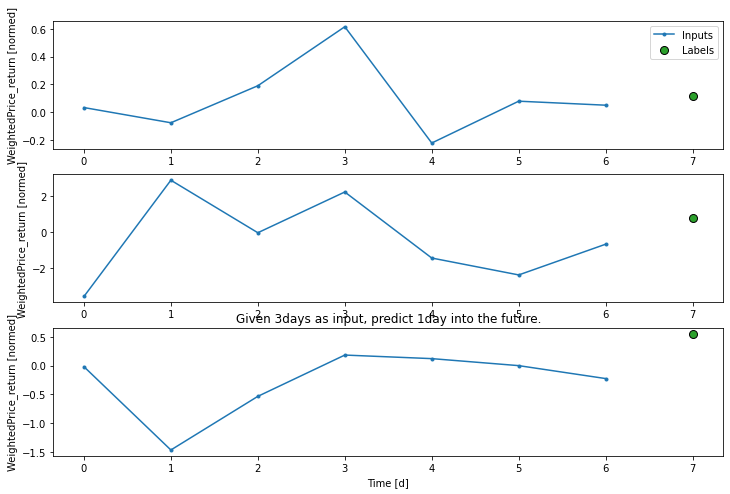

In [112]:
conv_window.window_plot()
plt.title("Given 3days as input, predict 1day into the future.")

#### Train a dense model on multiple input step

In [113]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [114]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 7, 52)
Output shape: (32, 1, 1)


In [115]:
history_dense_multi = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

17/17 [==============================] - 0s 940us/step - loss: 1.7732 - mean_absolute_error: 0.9337


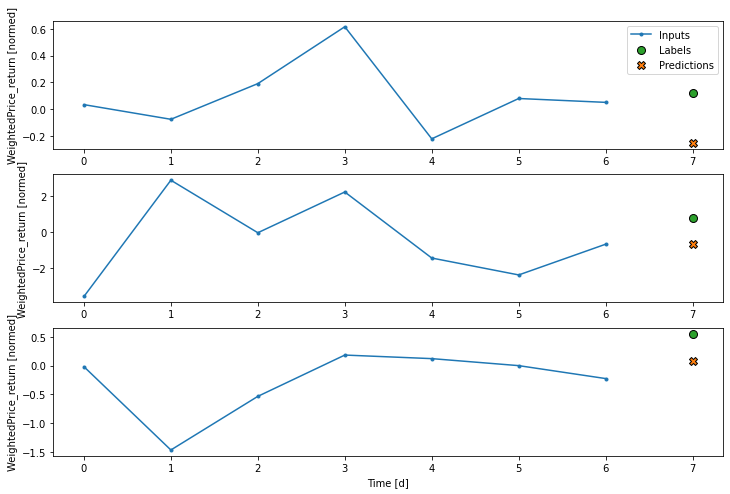

In [116]:
conv_window.window_plot(multi_step_dense)

In [117]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 30, 52)

InvalidArgumentError:Matrix size-incompatible: In[0]: [32,1560], In[1]: [364,32] [Op:MatMul]


<a id='t4'></a>
### <font color='darkblue'>__Convolutional Neural Network Model__</font>

In [118]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [119]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 7, 52)
Output shape: (32, 1, 1)


In [120]:
history_cnn = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

17/17 [==============================] - 0s 1ms/step - loss: 1.2703 - mean_absolute_error: 0.7499


In [121]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 30, 52)
Labels shape: (32, 30, 1)
Output shape: (32, 24, 1)


In [122]:
LABEL_WIDTH = 30
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['WeightedPrice_return'])

wide_conv_window

Total window size: 37
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Label indices: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36]
Label column name(s): ['WeightedPrice_return']

In [123]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 36, 52)
Labels shape: (32, 30, 1)
Output shape: (32, 30, 1)


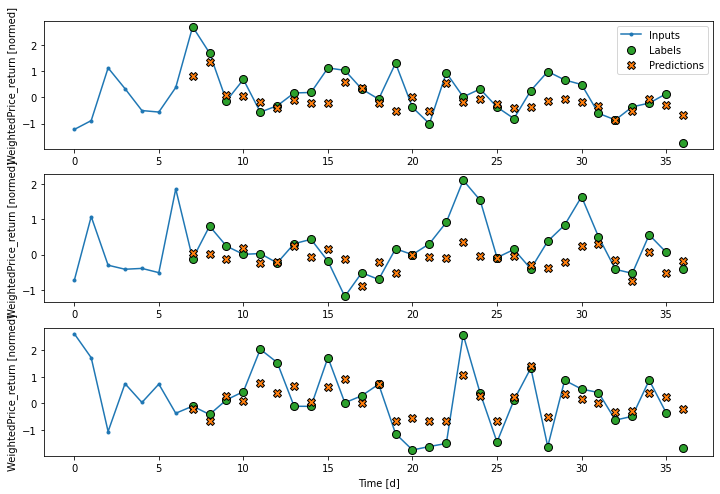

In [124]:
wide_conv_window.window_plot(conv_model)

<a id='t5'></a>
### <font color='darkblue'>__Recurrent Neural Network (RNN) Model__</font>

In [125]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [126]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 30, 52)
Output shape: (32, 30, 1)


In [127]:
history_lstm = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

16/16 [==============================] - 0s 3ms/step - loss: 0.9178 - mean_absolute_error: 0.6655


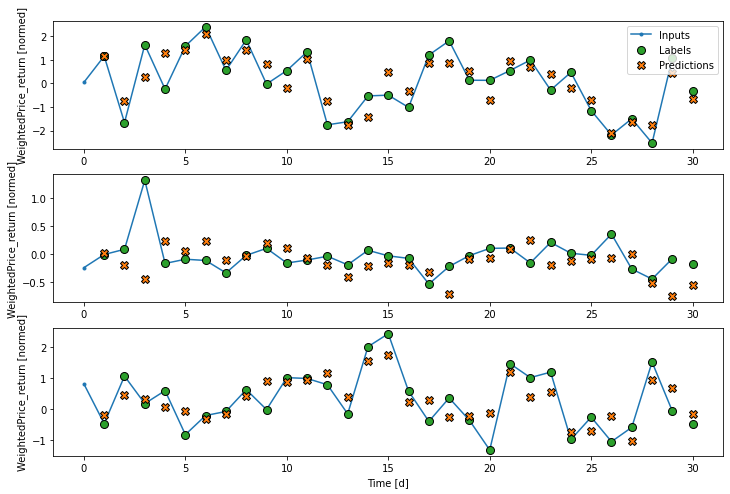

In [128]:
wide_window.window_plot(lstm_model)

#### Performance

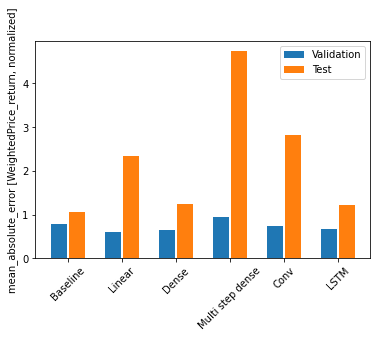

In [129]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [WeightedPrice_return, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [130]:
# Test Performance (MAE)
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 1.0498
Linear      : 2.3413
Dense       : 1.2528
Multi step dense: 4.7363
Conv        : 2.8268
LSTM        : 1.2263


<a id='t6'></a>
## <font color='darkblue'>__Multi-output models__</font>

In [131]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 30, 52)
Labels shape (batch, time, features): (32, 30, 52)


#### Baseline

In [132]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [133]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

16/16 [==============================] - 0s 970us/step - loss: 3.3865 - mean_absolute_error: 0.5370


#### Dense

In [134]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [135]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

17/17 [==============================] - 0s 1ms/step - loss: 2.1381 - mean_absolute_error: 0.5447


#### RNN

In [136]:
%%time
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

16/16 [==============================] - 0s 3ms/step - loss: 2.3447 - mean_absolute_error: 0.6336

Wall time: 11 s


#### Residual Connections

In [137]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [138]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

16/16 [==============================] - 0s 4ms/step - loss: 2.8996 - mean_absolute_error: 0.5201

Wall time: 15.1 s


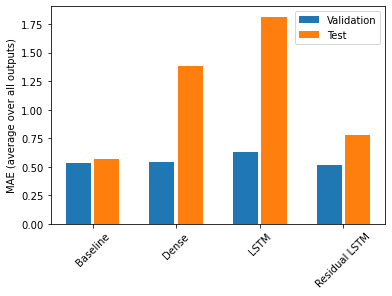

In [139]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

<a id='t7'></a>
### <font color='darkblue'>__Test Performance Evaluation__</font>

In [140]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.5724
Dense          : 1.3869
LSTM           : 1.8146
Residual LSTM  : 0.7775


Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): None

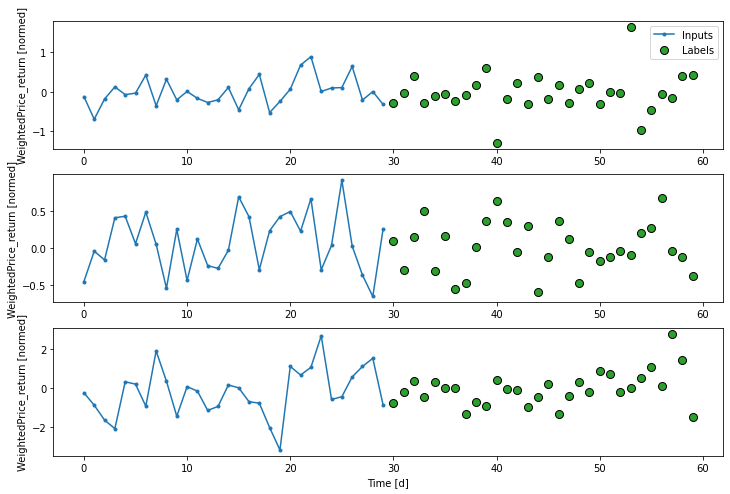

In [141]:
OUT_STEPS = 30
multi_window = WindowGenerator(input_width=30,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.window_plot()
multi_window

### Baselines

A simple baseline for this task is to repeat the last input time step for the required number of output timesteps:

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
15/15 [==============================] - 0s 7ms/step - loss: 4.3881 - mean_absolute_error: 0.6923


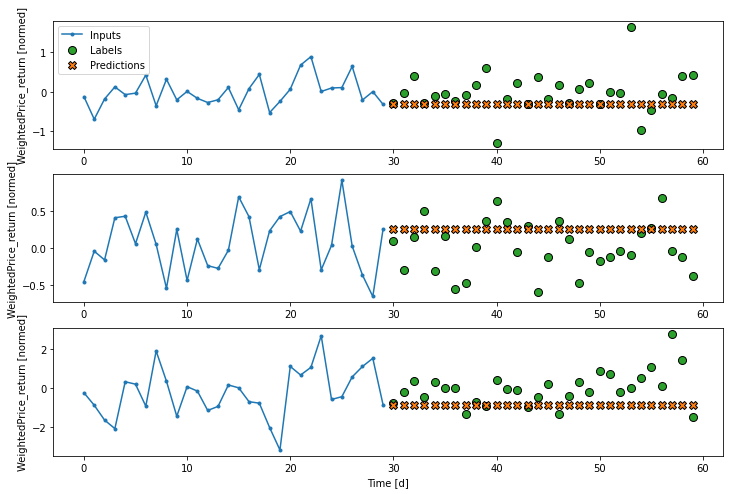

In [142]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.window_plot(last_baseline)

Since this task is to predict 30 days given the past 30 days another simple approach is to repeat the previous month, assuming next will be similar:

15/15 [==============================] - 0s 2ms/step - loss: 4.5076 - mean_absolute_error: 0.7670


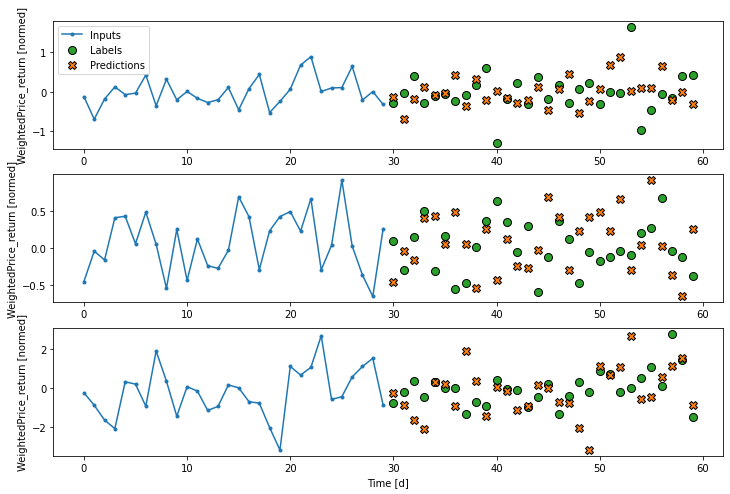

In [143]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.window_plot(repeat_baseline)

### Single-shot model

One high level approach to this problem is use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

#### Linear

15/15 [==============================] - 0s 12ms/step - loss: 2.4176 - mean_absolute_error: 0.6099


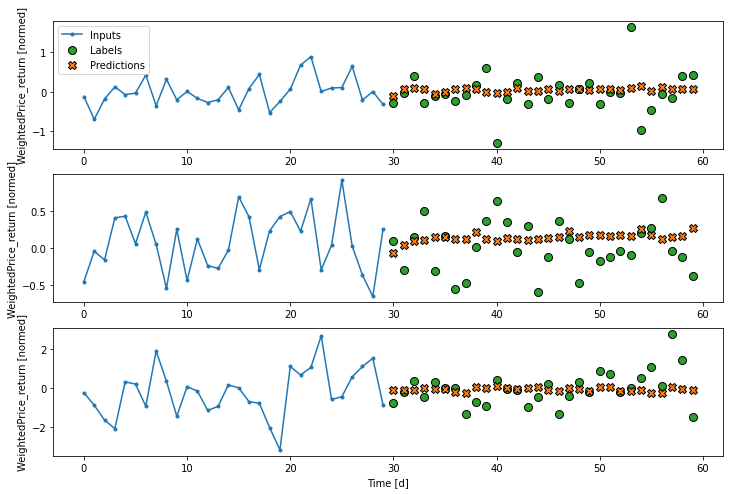

In [144]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.window_plot(multi_linear_model)

#### Dense

15/15 [==============================] - 0s 13ms/step - loss: 2.4471 - mean_absolute_error: 0.6141


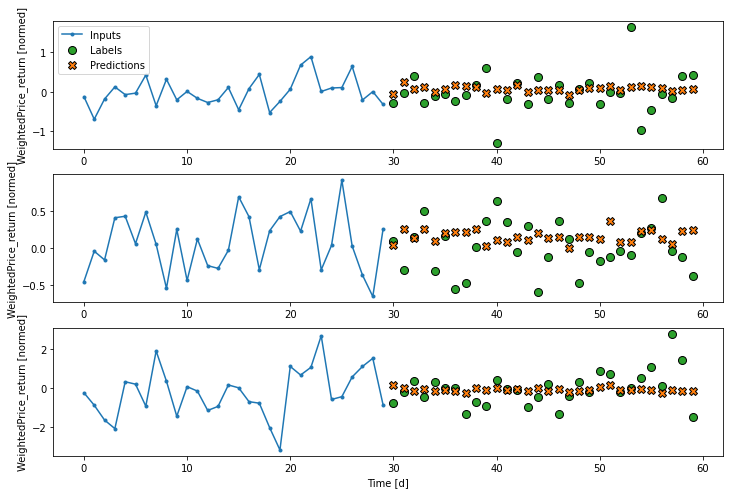

In [145]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.window_plot(multi_dense_model)

#### CNN

15/15 [==============================] - 0s 4ms/step - loss: 2.5127 - mean_absolute_error: 0.6562


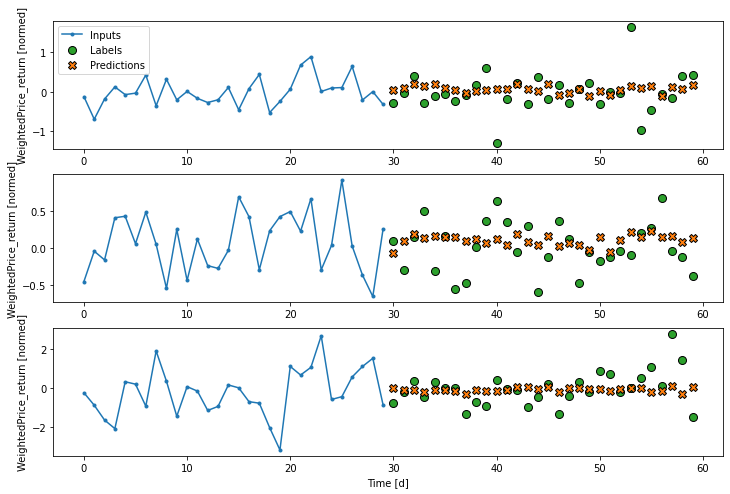

In [146]:
CONV_WIDTH = 7
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.window_plot(multi_conv_model)

#### RNN

15/15 [==============================] - 0s 4ms/step - loss: 2.6471 - mean_absolute_error: 0.7120


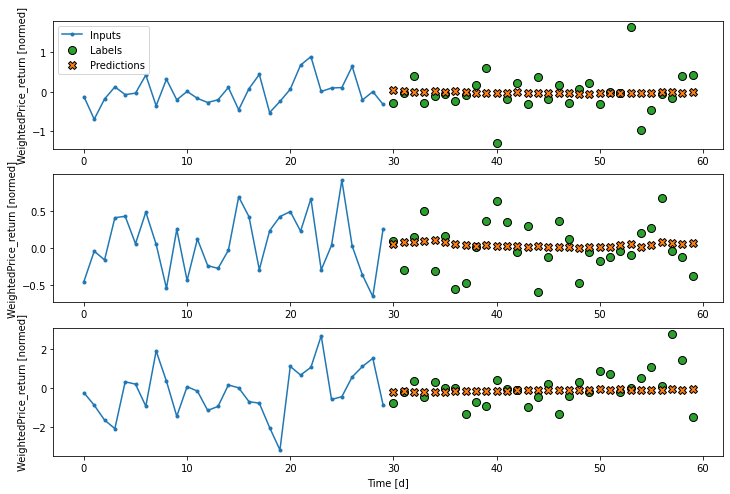

In [147]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.window_plot(multi_lstm_model)

<a id='t8'></a>
### <font color='darkblue'>__Autoregressive Model__</font>

#### RNN

In [148]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [149]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [150]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [151]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 52])

In [152]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [153]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 30, 52)


15/15 [==============================] - 0s 5ms/step - loss: 2.7105 - mean_absolute_error: 0.7303


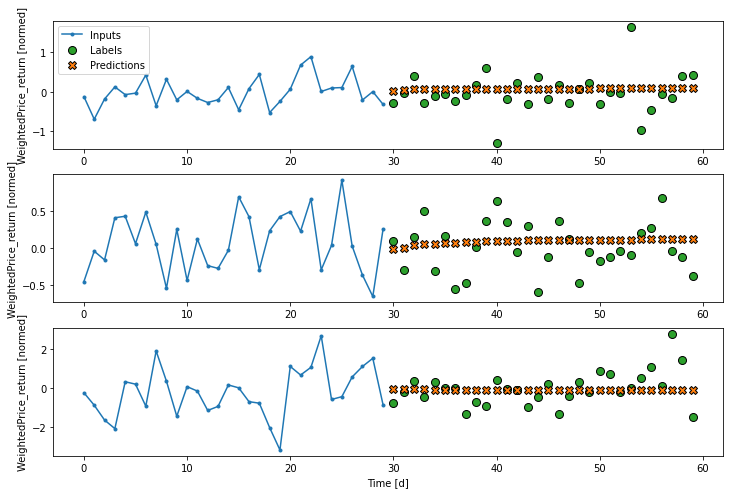

In [154]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.window_plot(feedback_model)

#### Performance

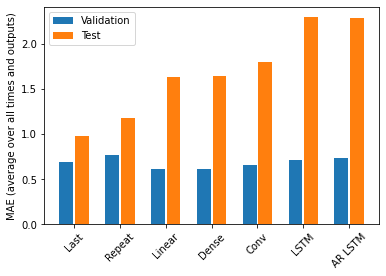

In [155]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [156]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.9738
Repeat  : 1.1817
Linear  : 1.6308
Dense   : 1.6413
Conv    : 1.7916
LSTM    : 2.2948
AR LSTM : 2.2848
